In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits(n_class=6)
X: np.ndarray = digits.data
Y: np.ndarray = digits.target

n_samples, n_features = X.shape
n_neighbors = 30


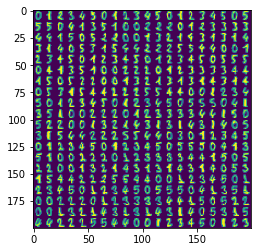

In [2]:
row_n_img = 20
img = np.zeros((10*row_n_img, 10*row_n_img))

for i in range(row_n_img):
    ix = 10 * i + 1
    for j in range(row_n_img):
        iy = 10 * j + 1
        img[ix:ix+8, iy:iy+8] = X[i*row_n_img+j].reshape((8, 8))

plt.imshow(img)
plt.show()


## Random Projection
Random 2d projection using a random unitary matrix

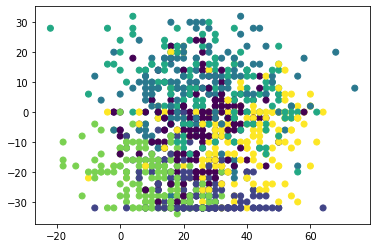

In [3]:
from sklearn import random_projection

rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X2 = rp.fit_transform(X)

colors = [int(i % 23) for i in Y]
plt.scatter(X2[:, 0], X2[:, 1], c=colors)


## PCA Projection
Projection on to the first 2 principal components

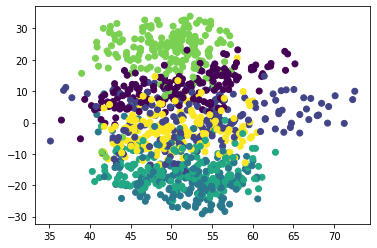

In [4]:
from time import time
from sklearn import decomposition

t0 = time()
pca = decomposition.TruncatedSVD(n_components=2)
X2 = pca.fit_transform(X)

colors = [int(i % 23) for i in Y]
plt.scatter(X2[:, 0], X2[:, 1], c=colors)


## Linear Discriminant Analysis projection
Projection of the first 2 linear discriminant components

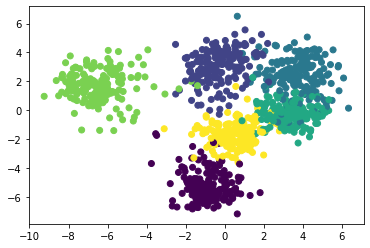

In [5]:
from sklearn import discriminant_analysis

X2: np.ndarray = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01
t0 = time()
X2 = discriminant_analysis.LinearDiscriminantAnalysis(
    n_components=2).fit_transform(X2, Y)

colors = [int(i % 32) for i in Y]
plt.scatter(X2[:, 0], X2[:, 1], c=colors)


## Isomap projection
Isomap projection of the digits dataset

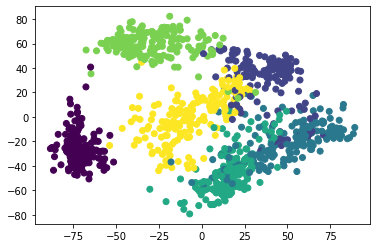

In [6]:
from sklearn import manifold

t0 = time()
X2 = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)

colors = [int(i % 23) for i in Y]
plt.scatter(X2[:, 0], X2[:, 1], c=colors)


## t-SNE embedding
t-SNE embedding of the digits dataset

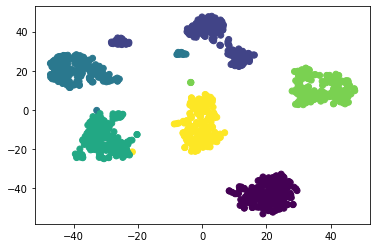

In [7]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X2 = tsne.fit_transform(X)

colors = [int(i % 23) for i in Y]
plt.scatter(X2[:, 0], X2[:, 1], c=colors)
